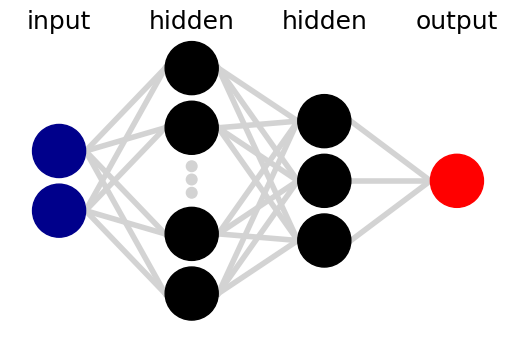

Epoch 0/1000, Loss: 1.1726
Epoch 99/1000, Loss: 0.3082
Epoch 199/1000, Loss: 0.3068
Epoch 299/1000, Loss: 0.3064
Epoch 399/1000, Loss: 0.3061
Epoch 499/1000, Loss: 0.3060
Epoch 599/1000, Loss: 0.3059
Epoch 699/1000, Loss: 0.3058
Epoch 799/1000, Loss: 0.3058
Epoch 899/1000, Loss: 0.3057
Epoch 999/1000, Loss: 0.3057


In [5]:
from neural.containers import Sequential
from neural.losses import MSE
from neural.layers import Dense, TanH, RELU, Softmax
import numpy as np 

# training data
x_train = np.array([[0,0], [0,1], [1,0], [1,1]])
y_train = np.array([0, 1, 1, 0])

# network
net = Sequential([
    Dense(2, 15),
    Dense(15, 3), 
    Dense(3, 1)])

net.display_network()

# train
net.fit(x_train, y_train, epochs=1000, learning_rate=0.1, loss_func=MSE())

In [29]:
from neural.containers import Sequential
from neural.losses import CE
from neural.utils.preprocessing import OneHotEncoder
from neural.layers import RELU, Softmax, Dense, TanH, Sigmoid, Flatten
import datasets.spiral_data as sd 
from sklearn.model_selection import train_test_split

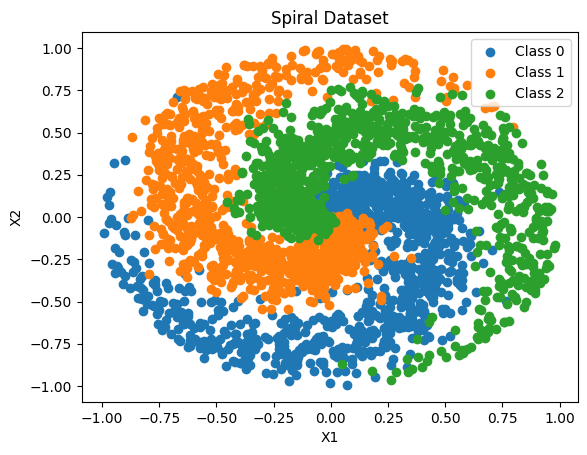

In [7]:
num_classes = 3
(x, y) = sd.generate_spiral_data(n_samples=1000, n_class=num_classes, noise=.5)
sd.plot_spiral(x,y,num_classes)

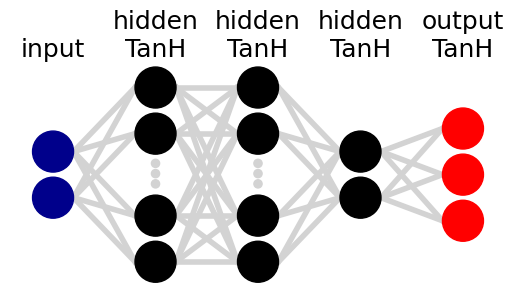

In [8]:
model = Sequential([
    Dense(2, 8),
    TanH(),
    Dense(8, 8),
    TanH(),
    Dense(8, 2),
    TanH(),
    Dense(2, num_classes),
    TanH()
])

model.display_network()

In [9]:
# encode the y's
encoder = OneHotEncoder()
encoder.fit(y)
y_encoded = encoder.encode(y)
X_train, X_test, y_train, y_test = train_test_split(x, y_encoded, test_size=.1)

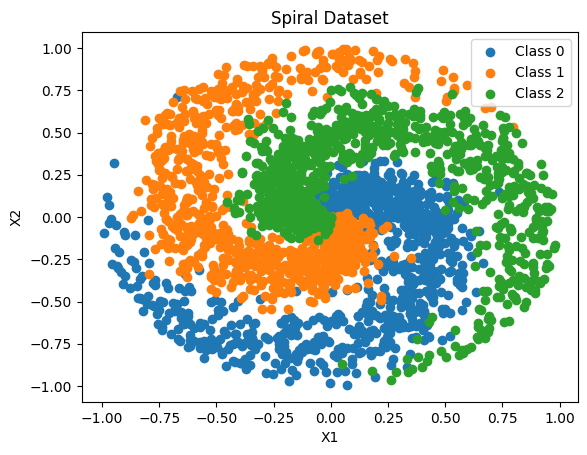

In [10]:
sd.plot_spiral(X_train, encoder.decode(y_train), num_classes=num_classes)

In [11]:
model.fit(X_train, y_train, 1000, .001, CE())
y_pred = encoder.decode(model.predict(X_test))
y_act = encoder.decode(y_test)

Epoch 0/1000, Loss: 4.1152
Epoch 99/1000, Loss: 0.5498
Epoch 199/1000, Loss: 0.3309
Epoch 299/1000, Loss: 0.2976
Epoch 399/1000, Loss: 0.2781
Epoch 499/1000, Loss: 0.2526
Epoch 599/1000, Loss: 0.2366
Epoch 699/1000, Loss: 0.2333
Epoch 799/1000, Loss: 0.2270
Epoch 899/1000, Loss: 0.2102
Epoch 999/1000, Loss: 0.2067


In [12]:
y_pred = np.argmax(model.predict(X_test), axis=1)
y_act = np.argmax(y_test, axis=1)
print(sum(y_pred == y_act) / len(y_test))

0.9133333333333333
